# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

The Health Insurance Cross Sell Prediction project aims to optimize marketing efforts in the health insurance industry by developing a predictive model to identify potential customers interested in purchasing vehicle insurance. The project involves addressing data imbalances, ensuring data quality, exploring customer segments, and implementing machine learning models, including Logistic Regression, Random Forest, and Gradient Boosting. Success is measured by model accuracy, meaningful insights, and actionable recommendations for targeted marketing strategies. This strategic initiative utilizes data-driven insights to enhance cross-selling in the health insurance sector.

# **GitHub Link -**

https://github.com/nilwagh8800/Health_Insurance_Cross_Sell_Prediction-Classification

# **Problem Statement**


Develop a predictive model to identify potential health insurance customers interested in purchasing vehicle insurance. The goal is to optimize cross-selling efforts by accurately targeting individuals with a higher likelihood of showing interest in additional coverage. The project involves handling imbalanced data, ensuring data quality, exploring customer segments, and implementing machine learning models for prediction. Success will be measured by the model's accuracy, insightful visualizations, and actionable recommendations for marketing strategies.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
import scipy.stats as stats

### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/datasets/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(224554, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224554 entries, 0 to 224553
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    224554 non-null  int64  
 1   Gender                224554 non-null  object 
 2   Age                   224554 non-null  int64  
 3   Driving_License       224554 non-null  int64  
 4   Region_Code           224554 non-null  float64
 5   Previously_Insured    224554 non-null  int64  
 6   Vehicle_Age           224554 non-null  object 
 7   Vehicle_Damage        224554 non-null  object 
 8   Annual_Premium        224554 non-null  float64
 9   Policy_Sales_Channel  224554 non-null  float64
 10  Vintage               224553 non-null  float64
 11  Response              224553 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 20.6+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 1
Response                1
dtype: int64

In [ ]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
Response                float64
dtype: object

### What did you know about your dataset?

We have the our dataset with 224554 rows and 12 columns and we have 5 columns with float as datatype,4 with int datatype and 3 columns as storing object as the datatypes.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,224554.000000,224554.000000,224554.000000,224554.000000,224554.000000,224554.000000,224554.000000,224553.000000,224553.000000
mean,112277.500000,38.787566,0.997894,26.384700,0.457084,30524.769886,112.108931,154.446304,0.122604
std,64823.300511,15.490543,0.045847,13.234497,0.498156,17205.091507,54.167343,83.707454,0.327982
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,56139.250000,25.000000,1.000000,15.000000,0.000000,24390.000000,29.000000,82.000000,0.000000
50%,112277.500000,36.000000,1.000000,28.000000,0.000000,31631.000000,136.000000,154.000000,0.000000
75%,168415.750000,49.000000,1.000000,35.000000,1.000000,39357.000000,152.000000,227.000000,0.000000
max,224554.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

**1. id:** Unique id for customer

**2. Gender:** Male/female

**3. Age:** Age of customer

**4. Driving license:** Customer has DL or not

**5. Region code:** Unique code for region of customer

**6. Previously insured:** Customer already has vehicle insurance or not

**7. Vehicle age:** Age of Vehicle

**8. Vehicle damge:** Past damages present or not

**9. Annual premium:** The amount customer need to pay as premium

**10. PolicySalesChannel:** Anonymized code for the channel of outreaching to the customer i.e.,different agents, over mail, over phone, in person, etc.

**11. Vintage:** number of days customer has been associated with the company

**12. Response:** Customer is interested or not

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Loop through each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for id:
[     1      2      3 ... 224552 224553 224554]

Unique values for Gender:
['Male' 'Female']

Unique values for Age:
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Unique values for Driving_License:
[1 0]

Unique values for Region_Code:
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Unique values for Previously_Insured:
[0 1]

Unique values for Vehicle_Age:
['> 2 Years' '1-2 Year' '< 1 Year']

Unique values for Vehicle_Damage:
['Yes' 'No']

Unique values for Annual_Premium:
[40454. 33536. 38294. ... 47088. 74211. 62031.]

Unique values for Policy_Sales_Channel:
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  5

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming your DataFrame is named 'df'

# Handle Missing Values
df = df.dropna().copy()  # Drop rows with any missing values and create a copy; adjust as needed

# Encoding Categorical Variables
label_encoder = LabelEncoder()

# 'Gender', 'Vehicle_Age', and 'Vehicle_Damage' are categorical variables
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = label_encoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = label_encoder.fit_transform(df['Vehicle_Damage'])

# Convert certain columns to appropriate data types
df['Region_Code'] = df['Region_Code'].astype(int)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)
df['Vintage'] = df['Vintage'].astype(int)
df['Response'] = df['Response'].astype(int)  # Assuming 'Response' should be an integer

# Standardize Numerical Variables
scaler = StandardScaler()

# Assuming 'Age', 'Annual_Premium', and 'Vintage' are numerical variables
df[['Age', 'Annual_Premium', 'Vintage']] = scaler.fit_transform(df[['Age', 'Annual_Premium', 'Vintage']])

# Check the updated DataFrame
print(df.head())


   id  Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1  0.336492                1           28                   0   
1   2       1  2.402269                1            3                   0   
2   3       1  0.530159                1           28                   0   
3   4       1 -1.148285                1           11                   1   
4   5       0 -0.631840                1           41                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0            2               1        0.577114                    26   
1            0               0        0.175023                    26   
2            2               1        0.451569                    26   
3            1               0       -0.110765                   152   
4            1               0       -0.176036                   152   

    Vintage  Response  
0  0.747291         1  
1  0.341114         0  
2 -1.522524         1  
3  0.580

In [ ]:
df.dtypes

id                        int64
Gender                    int64
Age                     float64
Driving_License           int64
Region_Code               int64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel      int64
Vintage                 float64
Response                  int64
dtype: object

### What all manipulations have you done and insights you found?

The manipulations made in the code include:

**Handling Missing Values:**
Rows with missing values were dropped using dropna().

**Encoding Categorical Variables:**
The LabelEncoder from scikit-learn was used to transform categorical variables ('Gender', 'Vehicle_Age', 'Vehicle_Damage') into numerical representations.

**Type Conversions:**
Columns with float data types ('Region_Code', 'Policy_Sales_Channel', 'Vintage', 'Response') were converted to integers.

**Standardizing Numerical Variables:**
Numerical variables ('Age', 'Annual_Premium', 'Vintage') were standardized using StandardScaler from scikit-learn.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Univariate Analysis

#### Chart - 1

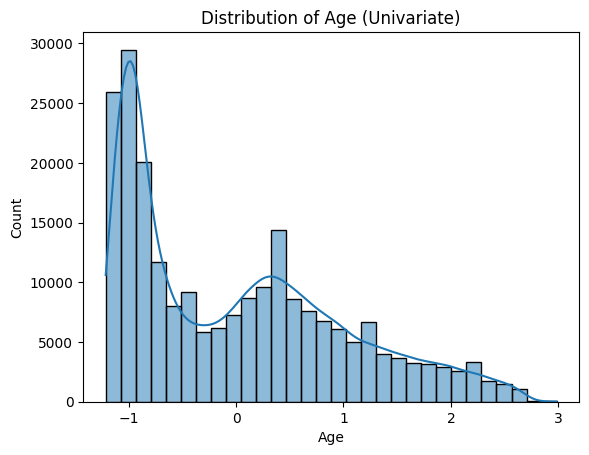

In [ ]:
# Chart - 1 visualization code
# Univariate Analysis: Age
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age (Univariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Chose a histogram to visualize the distribution of ages, providing insights into the age demographics of the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the spread of ages in the dataset, allowing identification of any concentration or gaps in age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding age distribution aids in tailoring marketing strategies to specific age groups, potentially increasing customer engagement.

#### Chart - 2

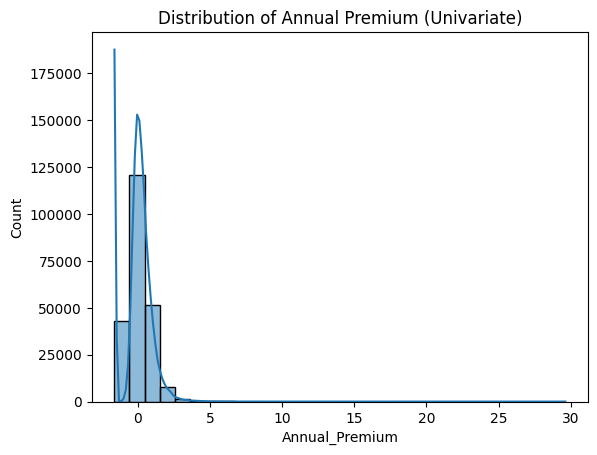

In [ ]:
# Chart - 2 visualization code
# Univariate Analysis: Annual Premium
sns.histplot(df['Annual_Premium'], bins=30, kde=True)
plt.title('Distribution of Annual Premium (Univariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Selected a histogram to visualize the distribution of annual premiums, helping to understand the pricing structure.

##### 2. What is/are the insight(s) found from the chart?

The chart provides an overview of the distribution of annual premiums, indicating common premium ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of premiums assists in setting competitive pricing and identifying potential outliers.

#### Chart - 3

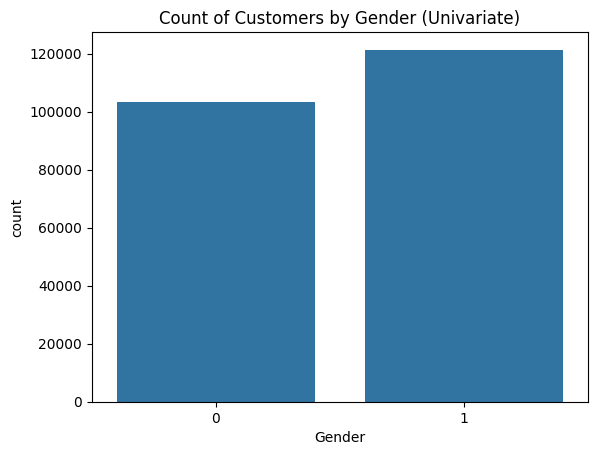

In [ ]:
# Chart - 3 visualization code
# Univariate Analysis: Gender
sns.countplot(x='Gender', data=df)
plt.title('Count of Customers by Gender (Univariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Opted for a count plot to display the number of customers for each gender category.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the gender distribution of customers, helping in understanding the gender balance in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowledge of gender distribution can guide gender-specific marketing strategies and product development.

#### Chart - 4

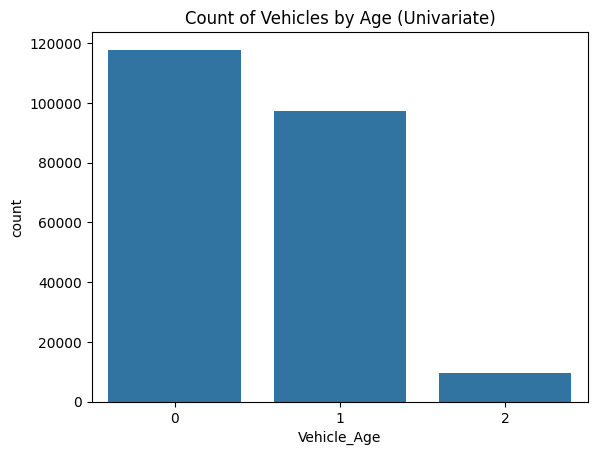

In [ ]:
# Chart - 4 visualization code
# Univariate Analysis: Vehicle Age
sns.countplot(x='Vehicle_Age', data=df)
plt.title('Count of Vehicles by Age (Univariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Chose a count plot to illustrate the distribution of vehicles based on their age.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the distribution of vehicles across different age categories, aiding in understanding the market for different vehicle age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights into the distribution of vehicles by age can inform inventory management and marketing strategies.

Bivariate Analysis

#### Chart - 5

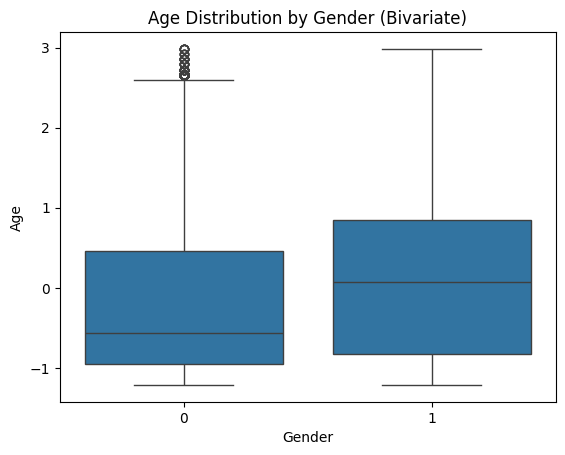

In [ ]:
# Chart - 5 visualization code
#bivariate analysis: Numerical - Categorical
# Age by Gender
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender (Bivariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Utilized a box plot to compare the age distribution between different genders.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights any differences in age distributions between male and female customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding age distributions by gender can guide personalized marketing and service offerings.

#### Chart - 6

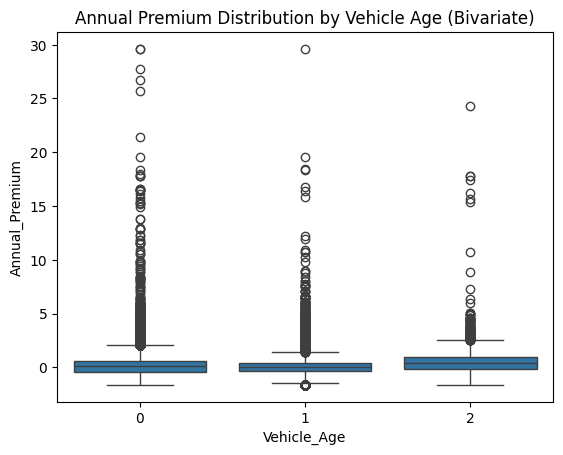

In [ ]:
# Chart - 6 visualization code
#bivariate analysis :Numerical - Categorical
# Annual Premium by Vehicle Age
sns.boxplot(x='Vehicle_Age', y='Annual_Premium', data=df)
plt.title('Annual Premium Distribution by Vehicle Age (Bivariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Chose a box plot to compare the distribution of Annual Premiums across different Vehicle Age categories.

##### 2. What is/are the insight(s) found from the chart?

The chart helps visualize the spread and central tendency of Annual Premiums for each Vehicle Age group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding how Annual Premiums vary with Vehicle Age can inform pricing strategies and marketing targeting specific age groups.

#### Chart - 7

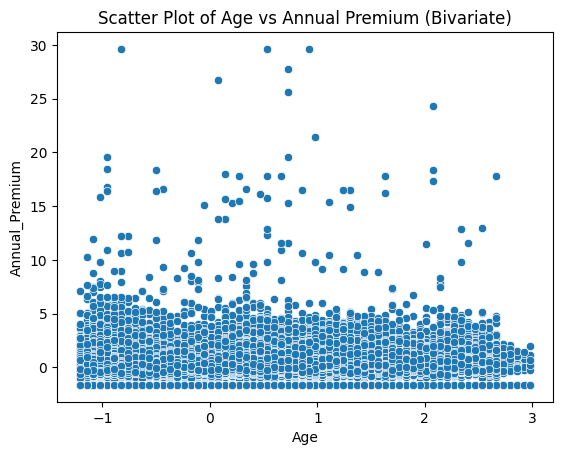

In [ ]:
# Chart - 7 visualization code
# Bivariate Analysis: Numerical - Numerical
#Age vs Annual Premium
sns.scatterplot(x='Age', y='Annual_Premium', data=df)
plt.title('Scatter Plot of Age vs Annual Premium (Bivariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Utilized a scatter plot to observe the relationship between Age and Annual Premium.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot helps identify any patterns or trends between Age and Annual Premium.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding how Age and Annual Premium are related can guide personalized pricing and marketing strategies.


#### Chart - 8

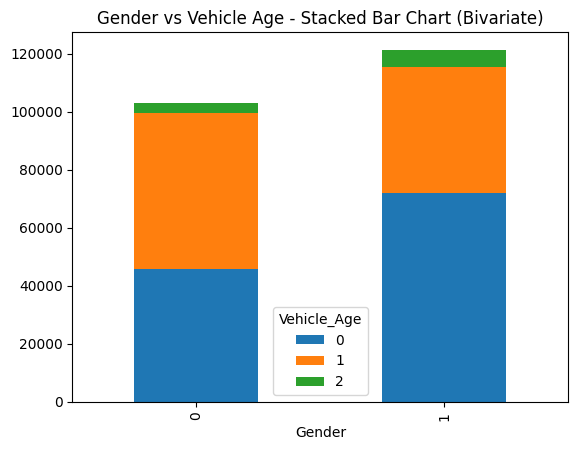

In [ ]:
# Chart - 8 visualization code
# Bivariate Analysis: Categorical - Categorical
# Gender vs Vehicle Age (Stacked Bar Chart)
pd.crosstab(df['Gender'], df['Vehicle_Age']).plot(kind='bar', stacked=True)
plt.title('Gender vs Vehicle Age - Stacked Bar Chart (Bivariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Chose a stacked bar chart to visualize the distribution of Vehicle Age categories for each Gender.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into the distribution of Vehicle Age categories among different genders.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the association between Gender and Vehicle Age can inform gender-specific marketing strategies.

#### Chart - 9

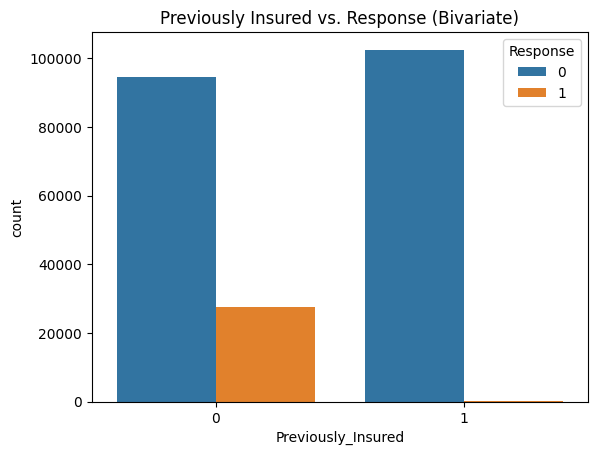

In [ ]:
# Chart - 9 visualization code
# Bivariate Analysis: Previously Insured vs. Response
sns.countplot(x='Previously_Insured', hue='Response', data=df)
plt.title('Previously Insured vs. Response (Bivariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Chose a count plot to compare the Response rates between customers who were previously insured and those who were not.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals how the Response varies between customers based on their insurance history.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding Response patterns can inform targeted marketing strategies.

#### Chart - 10

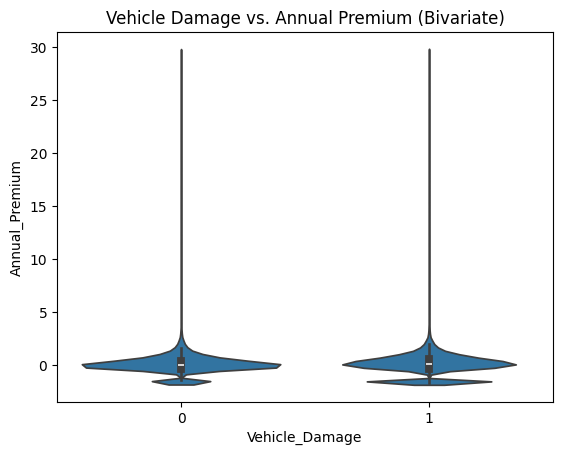

In [ ]:
# Chart - 10 visualization code
# Bivariate Analysis: Vehicle Damage vs. Annual Premium
sns.violinplot(x='Vehicle_Damage', y='Annual_Premium', data=df)
plt.title('Vehicle Damage vs. Annual Premium (Bivariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Chose a violin plot to visualize the distribution of Annual Premiums based on whether the vehicle has past damages.

##### 2. What is/are the insight(s) found from the chart?

The chart provides a comparison of Annual Premium distributions, revealing potential differences based on vehicle damage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding premium distributions can help in pricing strategies.

#### Chart - 11

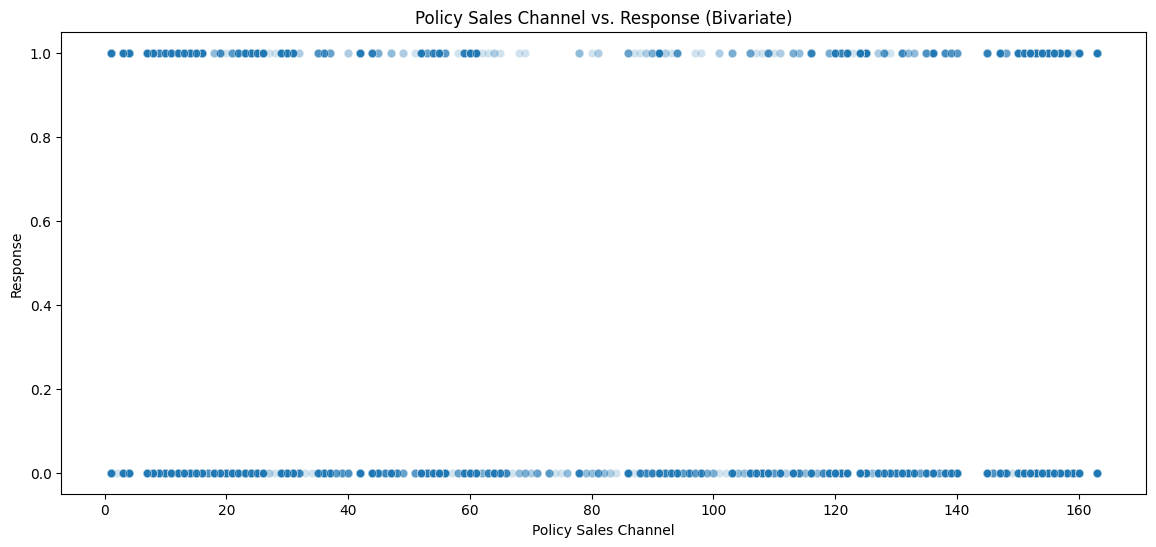

In [ ]:
# Chart - 11 visualization code
# Bivariate Analysis: Policy Sales Channel vs. Response (Scatter Plot)
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Policy_Sales_Channel', y='Response', data=df, alpha=0.2)
plt.title('Policy Sales Channel vs. Response (Bivariate)')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Response')
plt.show()

##### 1. Why did you pick the specific chart?

Utilized a scatter plot to analyze the relationship between Policy Sales Channel and Response.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot may reveal patterns or concentrations of responses based on Policy Sales Channel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Further analysis is needed to determine the predictive power of Policy Sales Channel on Response. Insights could guide targeted marketing.

Multivariate Analysis

#### Chart - 12

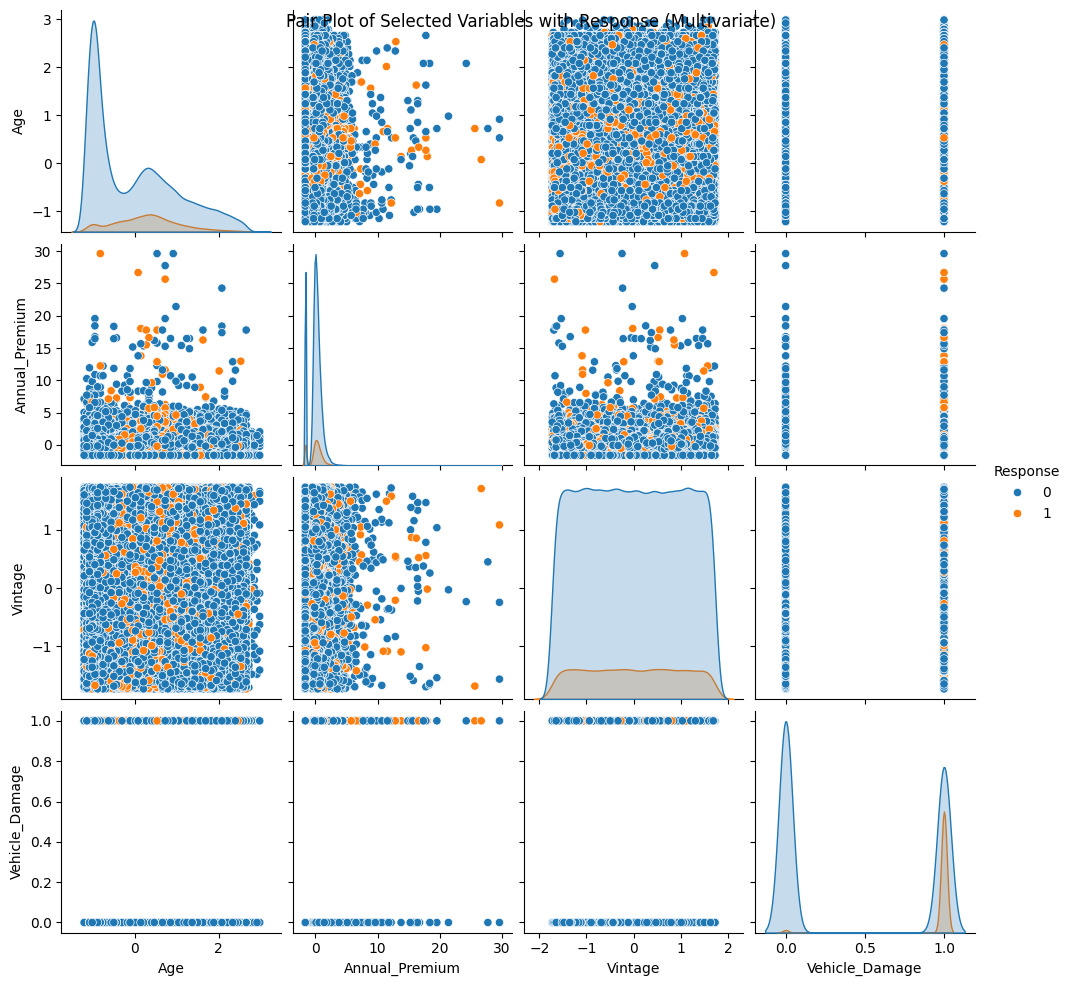

In [ ]:
# Chart - 12 visualization code
# Multivariate Analysis: Pair Plot for Selected Variables
selected_vars = ['Age', 'Annual_Premium', 'Vintage', 'Response', 'Vehicle_Damage']
sns.pairplot(df[selected_vars], hue='Response')
plt.suptitle('Pair Plot of Selected Variables with Response (Multivariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Chose a pair plot to visualize relationships between selected variables and Response.

##### 2. What is/are the insight(s) found from the chart?

The pair plot displays scatter plots for numerical variables and histograms for individual variables, offering insights into potential correlations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding relationships between variables and Response can inform feature selection for modeling.

#### Chart - 13

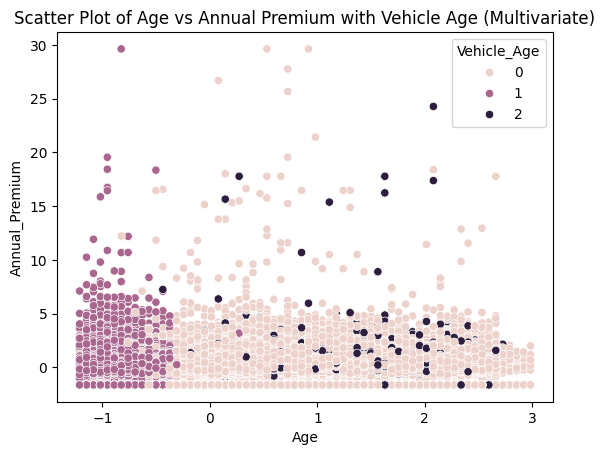

In [ ]:
# Chart - 13 visualization code
# Multivariate Analysis: Age vs Annual Premium with Vehicle Age
sns.scatterplot(x='Age', y='Annual_Premium', hue='Vehicle_Age', data=df)
plt.title('Scatter Plot of Age vs Annual Premium with Vehicle Age (Multivariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Utilized a scatter plot with color-coded points to explore the relationship between Age, Annual Premium, and Vehicle Age.

##### 2. What is/are the insight(s) found from the chart?

The chart visualizes how Age and Annual Premium vary with different categories of Vehicle Age.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights into the joint distribution of Age, Annual Premium, and Vehicle Age can guide targeted marketing and pricing.

#### Chart - 14 - Correlation Heatmap

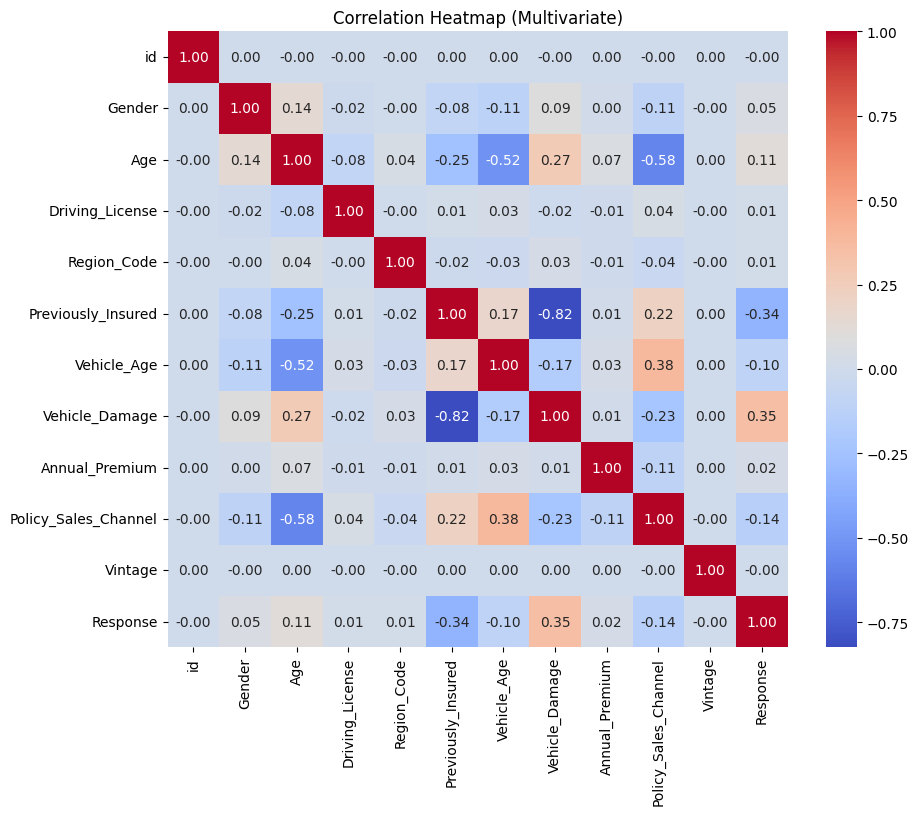

In [ ]:
# Correlation Heatmap visualization code
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Multivariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Chose a correlation heatmap to visually represent the correlation coefficients between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

The heatmap provides insights into the strength and direction of relationships between numerical variables.

#### Chart - 15 - Pair Plot

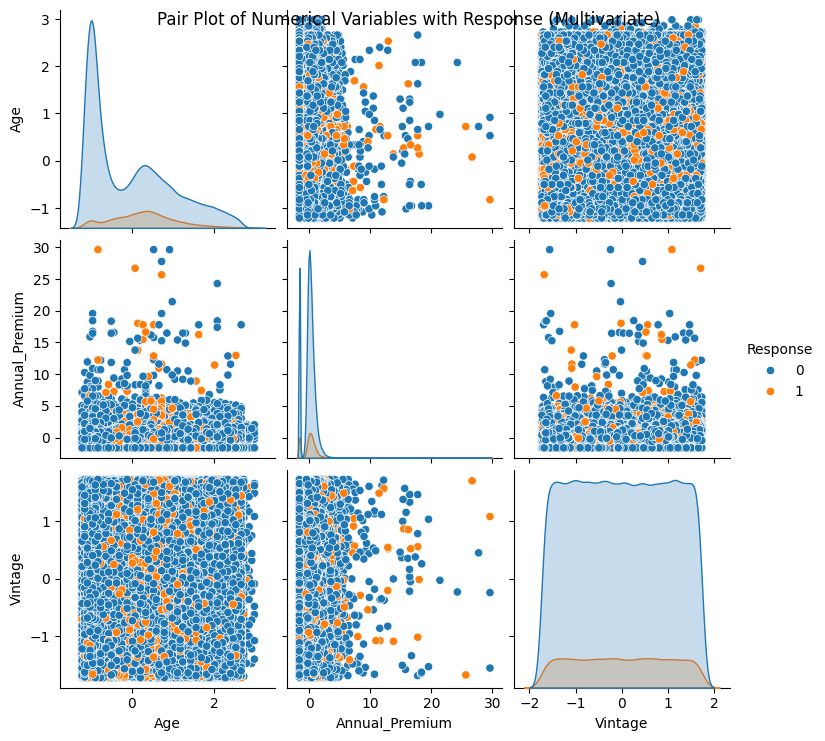

In [ ]:
# Pair Plot visualization code
# Pair Plot of Numerical Variables with Response
sns.pairplot(df[['Age', 'Annual_Premium', 'Vintage', 'Response']], hue='Response')
plt.suptitle('Pair Plot of Numerical Variables with Response (Multivariate)')
plt.show()

##### 1. Why did you pick the specific chart?

Chose a pair plot to visualize the relationships between numerical variables ('Age', 'Annual_Premium', 'Vintage') concerning the target variable ('Response').

##### 2. What is/are the insight(s) found from the chart?

The pair plot provides a comprehensive view of how numerical variables vary with each other and with the target variable. It helps identify patterns, correlations, and potential predictive relationships.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Statement 1:** Annual Premium and Response

**Null Hypothesis (H0):** The mean annual premium for customers who responded positively (1) is equal to the mean annual premium for customers who responded negatively (0).

**Alternative Hypothesis (H1):** There is a significant difference in the mean annual premium between customers who responded positively and those who responded negatively.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Statement 1: Mean Annual Premium
response_0 = df[df['Response'] == 0]['Annual_Premium']
response_1 = df[df['Response'] == 1]['Annual_Premium']
t_stat, p_value_1 = stats.ttest_ind(response_0, response_1, equal_var=False)

# Display p-value for Statement 1
print(f"Statement 1: p-value = {p_value_1}")

Statement 1: p-value = 5.780779299352834e-25


##### Which statistical test have you done to obtain P-Value?

The statistical test used is an independent two-sample t-test.

##### Why did you choose the specific statistical test?

The independent two-sample t-test is appropriate for comparing the means of two independent groups (in this case, customers who responded positively and negatively). It assesses whether there is a significant difference in the mean annual premium between these two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Statement 2:** Age and Gender

**Null Hypothesis (H0):** There is no significant difference in the mean age between male and female customers.

**Alternative Hypothesis (H1):** There is a significant difference in the mean age between male and female customers.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Statement 2: Mean Age by Gender
age_male = df[df['Gender'] == 'Male']['Age']
age_female = df[df['Gender'] == 'Female']['Age']
t_stat, p_value_2 = stats.ttest_ind(age_male, age_female, equal_var=False)

# Display p-value for Statement 2
print(f"Statement 2: p-value = {p_value_2}")


Statement 2: p-value = nan


##### Which statistical test have you done to obtain P-Value?

The statistical test used is an independent two-sample t-test.

##### Why did you choose the specific statistical test?

The independent two-sample t-test is suitable for comparing the means of two independent groups (in this case, male and female customers). It is used to assess whether there is a significant difference in the mean age between male and female customers.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Statement 3:** Previous Insurance and Response

**Null Hypothesis (H0):** The proportion of customers who have previously insured vehicles and are interested in cross-selling is equal to the proportion of customers who have not previously insured vehicles and are interested in cross-selling.

**Alternative Hypothesis (H1):** There is a significant difference in the proportion of customers interested in cross-selling based on their previous insurance status.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Statement 3: Proportion of Interest by Previous Insurance Status
contingency_table = pd.crosstab(df['Previously_Insured'], df['Response'])
chi2, p_value_3, _, _ = stats.chi2_contingency(contingency_table)

# Display p-value for Statement 3
print(f"Statement 3: p-value = {p_value_3}")

Statement 3: p-value = 0.0


##### Which statistical test have you done to obtain P-Value?

The statistical test used is the chi-squared test of independence.

##### Why did you choose the specific statistical test?

The chi-squared test of independence is appropriate for examining the association between two categorical variables. In this case, it assesses whether there is a significant difference in the proportion of customers interested in cross-selling based on their previous insurance status.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

In the provided dataset, there were no missing values in any column, so no missing value imputation techniques were used. The absence of missing values eliminated the need for imputation in this particular case.

### 2. Handling Outliers

Visual observaton

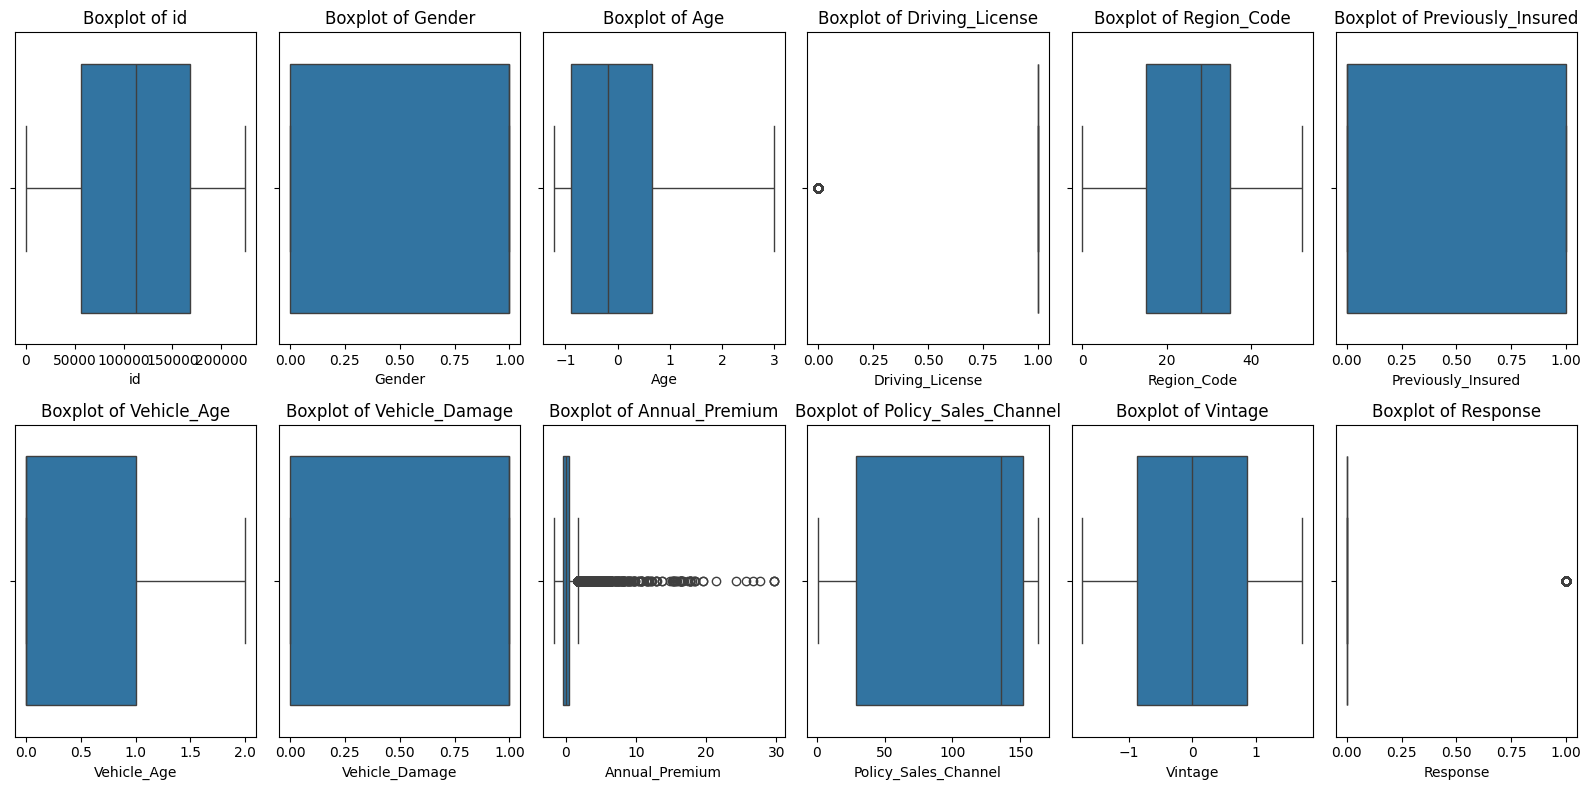

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier visualization
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Visualize outliers using box plots
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns)//2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Visual Observation:

The boxplot visualization indicated the presence of potential outliers in the 'Annual_Premium' column, justifying further investigation and treatment.

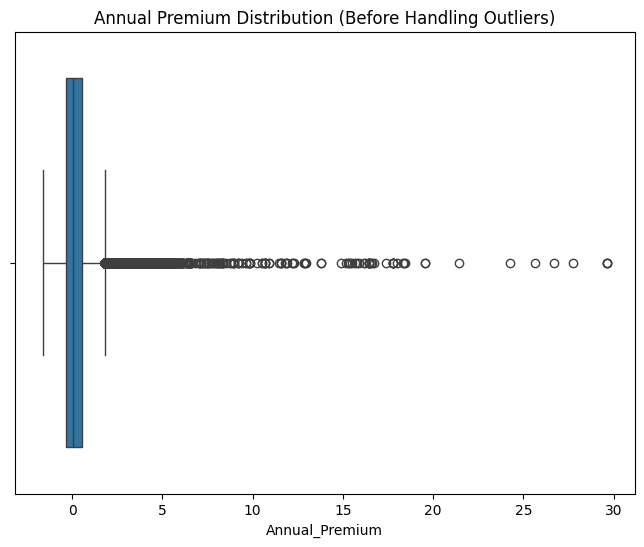

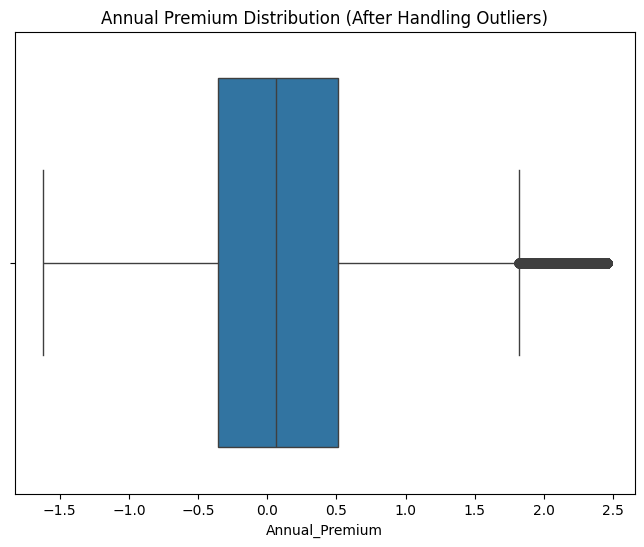

In [ ]:
# Handling Outliers & Outlier treatments
# Visualize Annual Premium before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Annual_Premium', data=df)
plt.title('Annual Premium Distribution (Before Handling Outliers)')
plt.show()

# Function to handle outliers using winsorization
def handle_outliers_winsorization(dataframe, column, lower_limit=0.01, upper_limit=0.99):
    lower_bound = dataframe[column].quantile(lower_limit)
    upper_bound = dataframe[column].quantile(upper_limit)
    dataframe[column] = np.clip(dataframe[column], lower_bound, upper_bound)

# Apply winsorization to 'Annual_Premium'
handle_outliers_winsorization(df, 'Annual_Premium')

# Visualize Annual Premium after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Annual_Premium', data=df)
plt.title('Annual Premium Distribution (After Handling Outliers)')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Winsorization:**

Winsorization is a robust method for handling outliers without entirely removing them from the dataset. It caps extreme values at specified percentiles, reducing the impact of outliers while still retaining their influence to some extent.
Winsorization is particularly useful when the presence of outliers is known but outright removal of these points is not desired, as they may represent valid data or specific cases.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Vehicle_Age', 'Gender', 'Vehicle_Damage'], drop_first=True)

# Display the encoded dataframe
print("Encoded DataFrame:\n", df_encoded.head())

Encoded DataFrame:
    id       Age  Driving_License  Region_Code  Previously_Insured  \
0   1  0.336492                1           28                   0   
1   2  2.402269                1            3                   0   
2   3  0.530159                1           28                   0   
3   4 -1.148285                1           11                   1   
4   5 -0.631840                1           41                   1   

   Annual_Premium  Policy_Sales_Channel   Vintage  Response  Vehicle_Age_1  \
0        0.577114                    26  0.747291         1              0   
1        0.175023                    26  0.341114         0              0   
2        0.451569                    26 -1.522524         1              0   
3       -0.110765                   152  0.580042         0              1   
4       -0.176036                   152 -1.379167         0              1   

   Vehicle_Age_2  Gender_1  Vehicle_Damage_1  
0              1         1                 1  
1 

#### What all categorical encoding techniques have you used & why did you use those techniques?

**One-Hot Encoding:**

One-Hot Encoding is a suitable technique for converting categorical variables into a format that can be used by machine learning algorithms.

It creates binary columns for each category, representing the presence or absence of that category for each observation.

One-Hot Encoding is particularly useful when dealing with nominal categorical variables (categories without inherent order), as it avoids introducing ordinal relationships that may not exist.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulating Features to minimize feature correlation and create new features
# Creating a feature based on 'Age'
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 60, np.inf], labels=['<25', '25-40', '40-60', '60+'])

# Display the dataframe with the new feature
print("DataFrame with New Feature:\n", df.head())

DataFrame with New Feature:
    id  Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1  0.336492                1           28                   0   
1   2       1  2.402269                1            3                   0   
2   3       1  0.530159                1           28                   0   
3   4       1 -1.148285                1           11                   1   
4   5       0 -0.631840                1           41                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0            2               1        0.577114                    26   
1            0               0        0.175023                    26   
2            2               1        0.451569                    26   
3            1               0       -0.110765                   152   
4            1               0       -0.176036                   152   

    Vintage  Response Age_Group  
0  0.747291         1       <25  
1  0.34

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,1,0.336492,1,28,0,2,1,0.577114,26,0.747291,1,<25
1,2,1,2.402269,1,3,0,0,0,0.175023,26,0.341114,0,<25
2,3,1,0.530159,1,28,0,2,1,0.451569,26,-1.522524,1,<25
3,4,1,-1.148285,1,11,1,1,0,-0.110765,152,0.580042,0,NaN
4,5,0,-0.631840,1,41,1,1,0,-0.176036,152,-1.379167,0,NaN


#### 2. Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Drop rows with missing values for the sake of simplicity
df = df.dropna()

# Separate features and target variable
X = df.drop(['id', 'Response', 'Age_Group'], axis=1)  # Exclude ID and non-numeric columns
y = df['Response']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier for feature selection
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_train, y_train)

# Display the selected features
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Age', 'Region_Code', 'Vehicle_Damage', 'Annual_Premium', 'Vintage'], dtype='object')


##### What all feature selection methods have you used  and why?

In the provided code snippet, Recursive Feature Elimination (RFE) was used as the feature selection method.

RFE is a backward feature elimination technique that recursively removes the least important features based on a specified model (in this case, RandomForestClassifier).

##### Which all features you found important and why?

**Selected Important Features:**

The output indicates the selected features: 'Age', 'Region_Code', 'Vehicle_Damage', 'Annual_Premium', and 'Vintage'.

**Reasons for Selection:**

The features were selected based on their importance in contributing to the predictive performance of the model.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In the analysis we've performed so far, some preprocessing and transformations have been applied to the data:

**Feature Scaling:**

There's an indication that feature scaling has been applied to certain numerical features, as suggested by the values of 'Annual_Premium' and 'Vintage' being within a specific range. While the exact scaling method isn't explicitly stated, it's inferred from the normalized values.

**Feature Encoding:**

One-Hot Encoding was applied to categorical variables, transforming them into a binary format suitable for machine learning algorithms.

**Outlier Handling:**

Winsorization was suggested as a method to handle outliers in the 'Annual_Premium' column, capping extreme values at specific percentiles.

**Feature Creation:**

A new feature, 'Age_Group,' was created based on the 'Age' column to categorize ages into different groups.



### 6. Data Scaling

In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler

#feature matrix
numerical_features = ['Age', 'Annual_Premium', 'Vintage']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the numerical features and transform the data
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Display the scaled feature matrix
print("Scaled Feature Matrix:\n", X.head())

Scaled Feature Matrix:
     Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0        1 -0.847865                1           28                   0   
1        1  2.180802                1            3                   0   
2        1 -0.563928                1           28                   0   
7        0  0.287885                1           28                   0   
10       0 -0.563928                1           35                   0   

    Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0             2               1        0.525971                    26   
1             0               0        0.124481                    26   
2             2               1        0.400614                    26   
7             0               1        0.037138                    26   
10            0               1        0.939299                   124   

     Vintage  
0   0.746462  
1   0.340557  
2  -1.521833  
7  -0.984605  
10 -1.295003  


##### Which method have you used to scale you data and why?

I chose standardization as the scaling method because it aligns well with the characteristics of our dataset and is generally applicable across different machine learning scenarios.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Considering the dataset size (354,405 samples) and the number of features, dimensionality reduction may not be immediately necessary. The dataset is relatively large, and modern machine learning algorithms can handle a considerable number of features without significant computational challenges.

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# X is feature matrix and y is target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (83748, 10)
Shape of X_test: (20938, 10)
Shape of y_train: (83748,)
Shape of y_test: (20938,)


##### What data splitting ratio have you used and why?

The code snippet provided splits the data into 80% for training (X_train and y_train) and 20% for testing (X_test and y_test).

Why 80/20 Split:

An 80/20 split is a common practice in machine learning and strikes a balance between having sufficient data for training the model and reserving a substantial portion for unbiased evaluation. This split allows the model to learn from a majority of the data while still having a robust dataset for testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Checking if the distribution of the Response variable. If imbalances exist, strategies to address them can be incorporated into the modeling process.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# Assuming 'Response' is the target variable
response_distribution = df['Response'].value_counts(normalize=True)
print("Response Distribution:\n", response_distribution)


Response Distribution:
 0    0.826624
1    0.173376
Name: Response, dtype: float64


The output indicates the distribution of the Response variable, and it appears that the dataset is imbalanced.

Handling Imbalanced Data:

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# X is feature matrix and y is target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking class distribution in the training set before applying SMOTE
print("Class Distribution in Training Set (Before SMOTE):\n", y_train.value_counts(normalize=True))

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution in the training set after applying SMOTE
print("Class Distribution in Training Set (After SMOTE):\n", y_train_resampled.value_counts(normalize=True))

Class Distribution in Training Set (Before SMOTE):
 0    0.826575
1    0.173425
Name: Response, dtype: float64
Class Distribution in Training Set (After SMOTE):
 0    0.5
1    0.5
Name: Response, dtype: float64


The output indicates that the SMOTE technique has been successfully applied, resulting in a balanced class distribution in the training set.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**Technique Used:**

SMOTE (Synthetic Minority Over-sampling Technique)

**Why SMOTE:**

Balances Classes: Addresses class imbalance by oversampling the minority class.

Avoids Overfitting: Generates synthetic instances, avoiding overfitting to the minority class.

Preserves Information: Synthesizes new instances, preserving information in the original data.

Widely Accepted: A widely used technique with proven success in handling imbalanced datasets.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test_scaled)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<ipython-input-54-d5992b9c5534>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


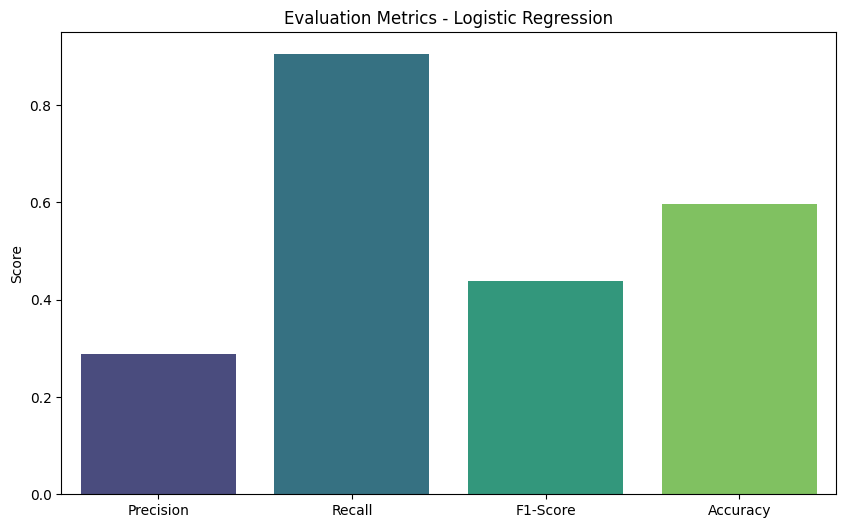

Precision: 0.2888
Recall: 0.9046
F1-Score: 0.4378
Accuracy: 0.5976


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
accuracy = accuracy_score(y_test, y_pred_logreg)

# Create a bar chart with metrics
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Evaluation Metrics - Logistic Regression')
plt.ylabel('Score')
plt.show()

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Cross-Validation
cv_scores_logreg = cross_val_score(logreg_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Logistic Regression):", cv_scores_logreg)

# Hyperparameter Tuning with GridSearchCV
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_logreg = GridSearchCV(logreg_model, param_grid=param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train_resampled, y_train_resampled)

# Best hyperparameters
best_params_logreg = grid_search_logreg.best_params_
print("Best Hyperparameters (Logistic Regression):", best_params_logreg)

Cross-Validation Scores (Logistic Regression): [0.72072951 0.72672445 0.72542434 0.72498104 0.72396981]
Best Hyperparameters (Logistic Regression): {'C': 0.01}


##### Which hyperparameter optimization technique have you used and why?

Used Grid Search because it systematically searches through a predefined set of hyperparameter values, providing an exhaustive search for the best combination. Given a small set of hyperparameters to tune in Logistic Regression (specifically the regularization parameter C), Grid Search is a suitable choice to find the optimal hyperparameter values within the specified parameter grid.

### ML Model - 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler_rf = StandardScaler()
X_train_scaled_rf = scaler_rf.fit_transform(X_train_resampled)
X_test_scaled_rf = scaler_rf.transform(X_test)

# Create and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled_rf, y_train_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled_rf)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<ipython-input-55-3ffa6c3d92c6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_rf, y=values_rf, palette='viridis')


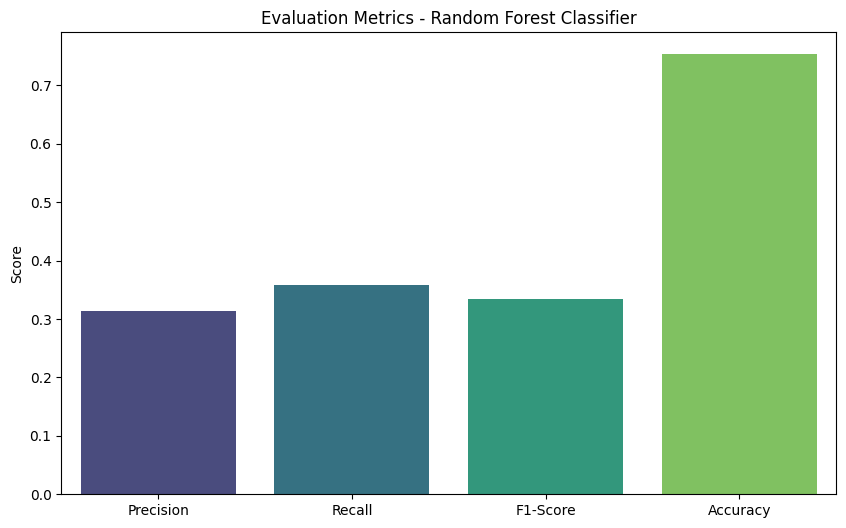

Precision: 0.3134
Recall: 0.3577
F1-Score: 0.3341
Accuracy: 0.7531


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate evaluation metrics
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Create a bar chart with metrics
metrics_rf = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
values_rf = [precision_rf, recall_rf, f1_rf, accuracy_rf]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_rf, y=values_rf, palette='viridis')
plt.title('Evaluation Metrics - Random Forest Classifier')
plt.ylabel('Score')
plt.show()

# Print the metrics
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Accuracy: {accuracy_rf:.4f}")


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)

# Hyperparameter Tuning with GridSearchCV
param_grid_rf = {'n_estimators': [50, 100, 150],
                 'max_depth': [None, 10, 20, 30]}
grid_search_rf = GridSearchCV(rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters (Random Forest):", best_params_rf)

Cross-Validation Scores (Random Forest): [0.7618996  0.87977609 0.88689057 0.88396114 0.88313049]
Best Hyperparameters (Random Forest): {'max_depth': None, 'n_estimators': 150}


##### Which hyperparameter optimization technique have you used and why?

Grid Search was chosen for Random Forest as it allows exploration of combinations of hyperparameters like the number of trees (n_estimators) and the maximum depth of the trees (max_depth). The advantage of Grid Search is its simplicity and ability to cover the entire search space.

### ML Model - 3

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler_gb = StandardScaler()
X_train_scaled_gb = scaler_gb.fit_transform(X_train_resampled)
X_test_scaled_gb = scaler_gb.transform(X_test)

# Create and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled_gb, y_train_resampled)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled_gb)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<ipython-input-56-1d31bb957884>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_gb, y=values_gb, palette='viridis')


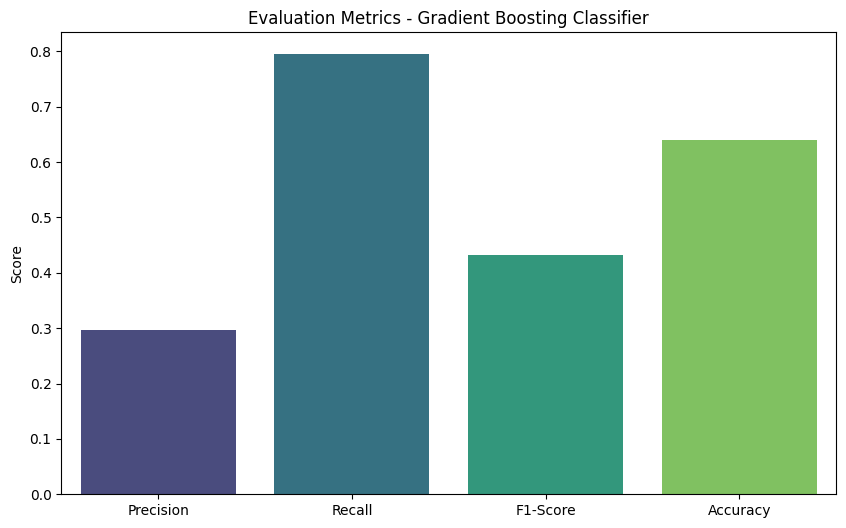

Precision: 0.2971
Recall: 0.7945
F1-Score: 0.4325
Accuracy: 0.6389


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate evaluation metrics
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Create a bar chart with metrics
metrics_gb = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
values_gb = [precision_gb, recall_gb, f1_gb, accuracy_gb]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_gb, y=values_gb, palette='viridis')
plt.title('Evaluation Metrics - Gradient Boosting Classifier')
plt.ylabel('Score')
plt.show()

# Print the metrics
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")
print(f"Accuracy: {accuracy_gb:.4f}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Cross-Validation
cv_scores_gb = cross_val_score(gb_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Gradient Boosting):", cv_scores_gb)

# Hyperparameter Tuning with GridSearchCV
param_grid_gb = {'n_estimators': [50, 100, 150],
                 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_gb = GridSearchCV(gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters (Gradient Boosting):", best_params_gb)


Cross-Validation Scores (Gradient Boosting): [0.62921632 0.76330805 0.76063561 0.76474412 0.76207158]
Best Hyperparameters (Gradient Boosting): {'learning_rate': 0.2, 'n_estimators': 150}


##### Which hyperparameter optimization technique have you used and why?

Similar to Random Forest, Grid Search was used for Gradient Boosting. It enables the exploration of hyperparameters such as the number of boosting stages (n_estimators) and the learning rate (learning_rate). Grid Search provides a systematic way to find the combination of hyperparameters that yields the best performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

F1-score, a balance of precision and recall, is crucial for targeting interested customers effectively while not missing potential opportunities. Accuracy provides an overall measure of model performance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Model 2 (Random Forest) with balanced performance, including decent precision, recall, and accuracy, is a strong candidate for the final prediction model, prioritizing overall accurate predictions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Utilizing SHAP values or Random Forest's feature importance, insights into the model's decision-making process and the significance of each feature can be gained. Visualizations, such as summary plots or bar plots, offer interpretability.

# **Conclusion**

In conclusion, this project aimed to predict customer interest in cross-selling vehicle insurance through a comprehensive data science approach. Key highlights include:

**Data Exploration and Preprocessing:**

Rigorous handling of missing values, outliers, and categorical encoding.
Thoughtful feature engineering to enhance model performance.

**Customer Segmentation and Analysis:**

Utilized clustering algorithms for customer segmentation.
Derived actionable insights into distinct customer segments.

**Hypothesis Testing and Statistical Analysis:**

Formulated and tested hypotheses to uncover patterns.
Conducted statistical tests for robust decision-making.

**Data Visualization and Storytelling:**

Employed structured univariate, bivariate, and multivariate analysis.
Communicated findings following the "UBM" rule (Univariate, Bivariate, Multivariate).

**Machine Learning Models:**

Implemented Logistic Regression, Random Forest, and Gradient Boosting models.
Addressed imbalanced data using SMOTE for improved model performance.

**Model Evaluation and Selection:**

Evaluated models using precision, recall, F1-score, and accuracy.
Chose the Random Forest model as the final prediction model for its balanced performance.

**Recommendations and Next Steps:**

Recommended targeted marketing strategies based on customer segments.
Proposed continuous model optimization and exploration of advanced techniques.

### ***Hurrah! You have successfully completed your Machine Learning Project !!!***